In [1]:
import torch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from lib import *
from tensor_admm import tensor_admm

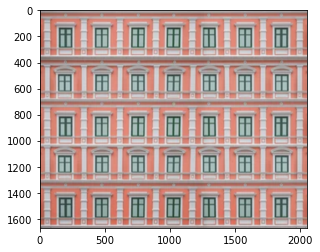

In [3]:
img = torch.from_numpy(np.array(Image.open('../test/test.jpeg'))).float()
img /= 255
plt.imshow(img)

In [9]:
# remove some point
remove_ratio = 0.5
width, height = img.size()[:2]
removed = sample(range(width * height), round(width * height * remove_ratio))
sampled_img = img.clone()
for i in removed:
        sampled_img[i % width, i // width, :] = 0

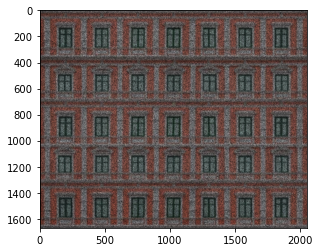

In [11]:
plt.imshow(sampled_img)

In [7]:
# parameters
max_iteration = 800

In [8]:
T, _, _, err_list = tensor_admm(
    T=img, 
    sampling_tensor=sampled_img, 
    proximal_type="TNN", 
    max_iteration=max_iteration
)

tensor(0.5088)
tensor(0.3609)
tensor(0.3815)
tensor(0.4128)
tensor(0.4357)
tensor(0.4582)
tensor(0.4805)
tensor(0.5064)
tensor(0.5345)
tensor(0.5634)
tensor(0.5922)
tensor(0.6199)
tensor(0.6462)
tensor(0.6710)
tensor(0.6947)
tensor(0.7176)
tensor(0.7401)
tensor(0.7622)
tensor(0.7842)
tensor(0.8059)
tensor(0.8273)
tensor(0.8483)
tensor(0.8686)
tensor(0.8881)
tensor(0.9067)
tensor(0.9242)
tensor(0.9403)
tensor(0.9549)
tensor(0.9678)
tensor(0.9786)
tensor(0.9870)
tensor(0.9929)
tensor(0.9966)
tensor(0.9986)
tensor(0.9996)
tensor(0.9999)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(1.0000)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9999)
tensor(0.9

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


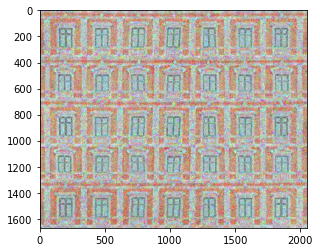

In [7]:
plt.imshow(T.real / 255)

### Synthetic Data

In [14]:
current_rank = 3
# default 100 * 100 * 100
T = rank_r_tensor(current_rank, 1000, 1000, 3)

p, q, r = T.size()
d = torch.zeros(r, device=get_device())
l = torch.zeros(r, device=get_device())

for j in range(r):
    d[j] = randint(q * 0.75, q)
    l[j] = randint(q * 0.75, p)

sample_ratio = 0.5
sampling_type = "fully random"
max_iteration = 500
# Sample observed data based on the sampling type
sampling_tensor = generate_sampling_tensor(p, q, r, sampling_type, sample_ratio)

In [15]:
T, _, _, err_list = tensor_admm(
    T=T, 
    sampling_tensor=sampling_tensor, 
    proximal_type="TNN", 
    max_iteration=max_iteration
)

tensor(0.5543)
tensor(0.1117)
tensor(0.2391)
tensor(0.2511)
tensor(0.1378)
tensor(0.0293)
tensor(0.0587)
tensor(0.0626)
tensor(0.0354)
tensor(0.0087)
tensor(0.0143)
tensor(0.0155)
tensor(0.0090)
tensor(0.0024)
tensor(0.0035)
tensor(0.0038)
tensor(0.0023)
tensor(0.0007)
tensor(0.0008)
tensor(0.0009)
tensor(0.0006)
tensor(0.0002)
tensor(0.0002)
tensor(0.0002)
tensor(0.0002)
tensor(5.7008e-05)
tensor(4.9028e-05)
tensor(5.7052e-05)
tensor(3.8720e-05)
tensor(1.5236e-05)
tensor(1.2540e-05)
tensor(1.3254e-05)
tensor(9.1935e-06)
tensor(4.0629e-06)
tensor(2.9869e-06)
tensor(3.1376e-06)
tensor(2.3687e-06)


KeyboardInterrupt: 